# THE SPARKS FOUNDATION
# GRIP FEB21

## Task 1: PREDICTION USING SUPERVISED ML
### **NAME-RAMESH GHOSH**
** In this task we have to predict the percentage of score if a student studies for 9.25 hrs/day.The data contains two variables which are no of hours studied and the percentage of score.**

In [1]:
# Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Reading data from given link
link="http://bit.ly/w-data"
df=pd.read_csv(link)


In [3]:
# First 5 rows of the data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

which means there are 25 rows and 2 columns in the dataset.

In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

which shows no null values in the data.

**Let's plot our data points and see if we can manually find any relationship between the data.**

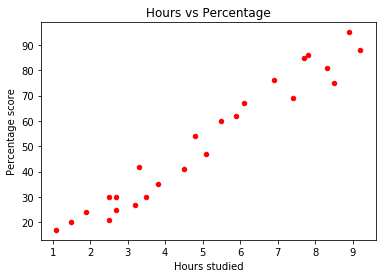

In [12]:
df.plot(x='Hours',y='Scores',kind='scatter',color='red')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.title('Hours vs Percentage')
plt.show()

In [13]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### **From the above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

** Now, we will split our data into train and test using the sklearn library.**

In [15]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=50)

**After spliting the data it is time to train our algorithm.**

In [18]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

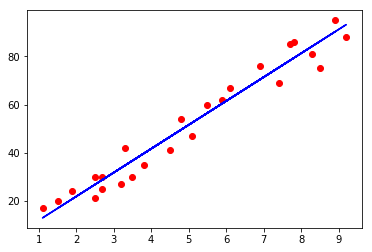

In [25]:
# Intercept on y_axis
a=reg.intercept_

# Slope of the regression line
b=reg.coef_

# Plotting the regression line
line=a+b*X

plt.scatter(X,y,color='red')
plt.plot(X,line,color='blue')
plt.show()

**Now that we have trained our algorithm, it's time to make some predictions.**

In [27]:
#Predicting the scores
y_pred=reg.predict(X_test)
y_pred

array([ 16.88414476,  33.73226078,  75.357018  ,  26.79480124,  60.49103328])

**Comparing actual vs predicted.**

In [28]:
actual_predicted=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
actual_predicted

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## What would be the predicted score if a student studies for 9.25 hours/day?

In [36]:
hours=9.25
predicted_score=reg.predict(hours)
pd.DataFrame({'Hours':9.25,'Predicted Score':predicted_score})

,Hours,Predicted Score
0,9.25,93.691732


#### ** If a student studies for 9.25 hours/day, he/she will score 93.69% in exam.**

### Evaluating the model

The final step is to evaluate the performance of our algorithm.For that we will use mean absolute error and R-squared.

In [43]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean absolute error :',metrics.mean_absolute_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

Mean absolute error : 4.183859899
R2 score: 0.945490689211


Higher R-squared means the model is better.

## Thank you